In [66]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [67]:
df_foot = pd.read_csv('footdata.csv')

In [68]:
df_foot.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A'],
      dtype='object')

In [69]:
df_HA_win = df_foot.filter(['HomeTeam','AwayTeam','B365H','B365D','B365A','HTR'])
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR
0,Bordeaux,Lens,2.20,2.87,3.60,H
1,Caen,Nice,2.40,2.75,3.00,D
2,Lille,Lorient,1.72,3.00,5.00,D
3,Monaco,St Etienne,1.90,2.90,4.00,H
4,Paris SG,Sochaux,1.72,3.40,5.00,D
...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D
376,Nice,Caen,2.05,3.25,3.75,D
377,Sochaux,Paris SG,3.80,3.25,2.00,A
378,St Etienne,Monaco,1.72,3.40,5.25,H


In [70]:
teams = df_foot.HomeTeam.unique()
teams

array(['Bordeaux', 'Caen', 'Lille', 'Monaco', 'Paris SG', 'Rennes',
       'Strasbourg', 'Valenciennes', 'Le Mans', 'Lyon', 'Auxerre',
       'Lorient', 'Marseille', 'Nancy', 'Nice', 'Sochaux', 'St Etienne',
       'Toulouse', 'Lens', 'Metz'], dtype=object)

In [71]:
df_HA_win["BetTeam"] = ''
df_HA_win['BetTeam'] = df_HA_win.iloc[0:][['B365H', 'B365D', 'B365A']].idxmin(axis=1)

In [72]:
df_HA_win['BetTeam'] = df_HA_win['BetTeam'].str.replace(r'B365', '')
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam
0,Bordeaux,Lens,2.20,2.87,3.60,H,H
1,Caen,Nice,2.40,2.75,3.00,D,H
2,Lille,Lorient,1.72,3.00,5.00,D,H
3,Monaco,St Etienne,1.90,2.90,4.00,H,H
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H
...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H
376,Nice,Caen,2.05,3.25,3.75,D,H
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A
378,St Etienne,Monaco,1.72,3.40,5.25,H,H


In [73]:
df_HA_win['ecart_bet'] = ''
df_HA_win['ecart_bet'] = abs(df_HA_win.iloc[0:]['B365H'] - df_HA_win.iloc[0:]['B365A'])
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40
1,Caen,Nice,2.40,2.75,3.00,D,H,0.60
2,Lille,Lorient,1.72,3.00,5.00,D,H,3.28
3,Monaco,St Etienne,1.90,2.90,4.00,H,H,2.10
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H,3.28
...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H,3.85
376,Nice,Caen,2.05,3.25,3.75,D,H,1.70
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A,1.80
378,St Etienne,Monaco,1.72,3.40,5.25,H,H,3.53


## Number of bad prediction bet

In [74]:
df_HA_win['good_bet'] = df_HA_win['HTR'].str.lower() == df_HA_win['BetTeam'].str.lower()

In [75]:
df_HA_win['good_bet'] *= 1

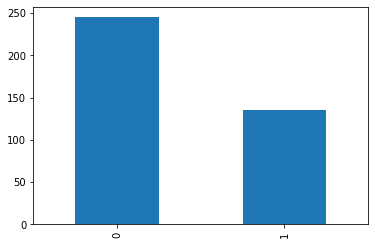

In [76]:
df_HA_win['good_bet'].value_counts().plot(kind='bar')

In [77]:
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40,1
1,Caen,Nice,2.40,2.75,3.00,D,H,0.60,0
2,Lille,Lorient,1.72,3.00,5.00,D,H,3.28,0
3,Monaco,St Etienne,1.90,2.90,4.00,H,H,2.10,1
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H,3.28,0
...,...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H,3.85,0
376,Nice,Caen,2.05,3.25,3.75,D,H,1.70,0
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A,1.80,1
378,St Etienne,Monaco,1.72,3.40,5.25,H,H,3.53,1


In [82]:
df_HA_win['bet_interval'] = pd.cut(x=df_HA_win['ecart_bet'], bins=[0,1, 2, 3, 4, 5, 6, 7, 8])
df_HA_win

,HomeTeam,AwayTeam,B365H,B365D,B365A,HTR,BetTeam,ecart_bet,good_bet,bet_interval
0,Bordeaux,Lens,2.20,2.87,3.60,H,H,1.40,1,"(1, 2]"
1,Caen,Nice,2.40,2.75,3.00,D,H,0.60,0,"(0, 1]"
2,Lille,Lorient,1.72,3.00,5.00,D,H,3.28,0,"(3, 4]"
3,Monaco,St Etienne,1.90,2.90,4.00,H,H,2.10,1,"(2, 3]"
4,Paris SG,Sochaux,1.72,3.40,5.00,D,H,3.28,0,"(3, 4]"
...,...,...,...,...,...,...,...,...,...,...
375,Nancy,Rennes,1.65,3.60,5.50,D,H,3.85,0,"(3, 4]"
376,Nice,Caen,2.05,3.25,3.75,D,H,1.70,0,"(1, 2]"
377,Sochaux,Paris SG,3.80,3.25,2.00,A,A,1.80,1,"(1, 2]"
378,St Etienne,Monaco,1.72,3.40,5.25,H,H,3.53,1,"(3, 4]"


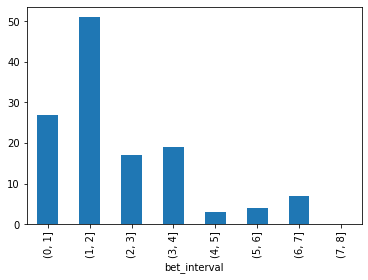

In [79]:
x =df_HA_win.groupby(by=["bet_interval"]).sum()
x['good_bet'].plot(kind='bar')

In [84]:
x